# Imports

In [1]:
# Imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

In [2]:
# Read the preprocessed dataset and display the first 7 rows
data = pd.read_csv("median_processed.csv")
data.head(4)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,221.0,238.0,20.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,158.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,249.0,0.0,0.0,0.0,0.0,1


# Representative plots

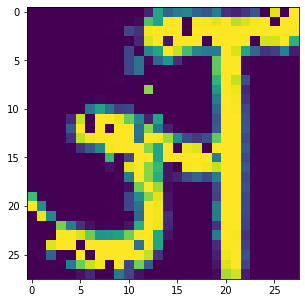

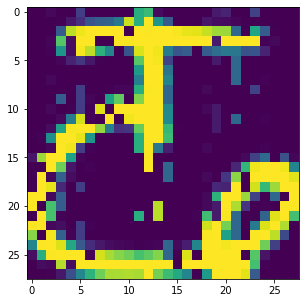

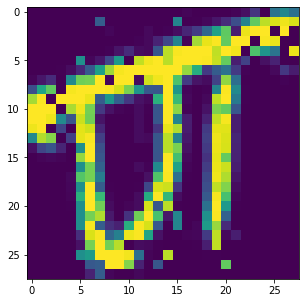

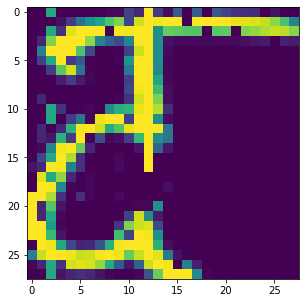

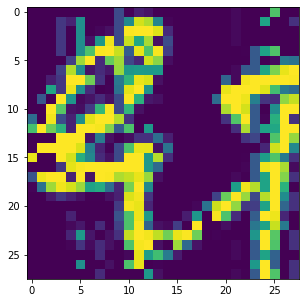

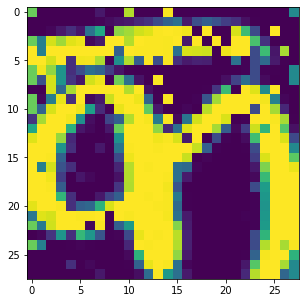

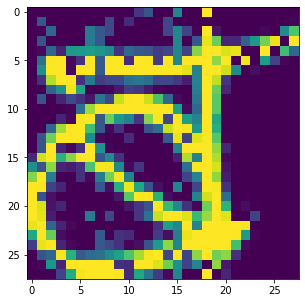

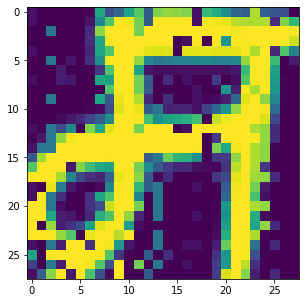

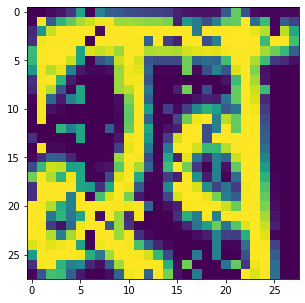

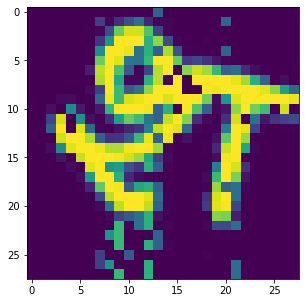

In [3]:
# Plot one image corresponding to all the characters
for i in range(0,10000, 1000):
    plt.figure(figsize=(7,5))
    plt.imshow(np.array(data.iloc[i][:-1]).reshape(28,28))

# Apply Models

In [4]:
from sklearn.model_selection import train_test_split

# Drop the Labels column to obtain X. Assign the Labels column to Y
X = data.drop(["Labels"],axis=1)
Y = data["Labels"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Support Vector Machines

In [ ]:
# Use the rbf kernel
from sklearn import svm, datasets
rbf = svm.SVC(kernel='rbf').fit(X_train, y_train)
y_pred = rbf.predict(X_test)

In [21]:
y_pred

array([ 7,  5,  2, ...,  7,  9, 10], dtype=int64)

In [22]:
# Compute the accuracy and f1 scores for the SVM Model

rbf_accuracy = accuracy_score(y_test, y_pred)
rbf_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  92.85
F1 (RBF Kernel):  92.83


# K - Nearest Neighbours

In [5]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, Y,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

In [15]:
#Use cross validation error for determining optimal value of k
from sklearn.neighbors import KNeighborsClassifier
import math

# Set minimum error and k value to defaults
min_error = math.pow(10, 7)
k_value = math.pow(10,3)

for k in range(3,30):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    
    y_pred_val = classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    print("Accuracy computed for k = "+str(k))
    error = 1 - accuracy
    
    # if the error obtained is less than the minimum error, update the value of k_value and the min_error
    if error<min_error:
        k_value=k
        min_error = error

Accuracy computed for k = 3
Accuracy computed for k = 4
Accuracy computed for k = 5
Accuracy computed for k = 6
Accuracy computed for k = 7
Accuracy computed for k = 8
Accuracy computed for k = 9
Accuracy computed for k = 10
Accuracy computed for k = 11
Accuracy computed for k = 12
Accuracy computed for k = 13
Accuracy computed for k = 14
Accuracy computed for k = 15
Accuracy computed for k = 16
Accuracy computed for k = 17
Accuracy computed for k = 18
Accuracy computed for k = 19
Accuracy computed for k = 20
Accuracy computed for k = 21
Accuracy computed for k = 22
Accuracy computed for k = 23
Accuracy computed for k = 24
Accuracy computed for k = 25
Accuracy computed for k = 26
Accuracy computed for k = 27
Accuracy computed for k = 28
Accuracy computed for k = 29


# Use the k corresponding to the least validation error

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
test_size=0.33, shuffle = True, random_state = 67)

classifier = KNeighborsClassifier(n_neighbors = k_value)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [20]:
print('Accuracy (KNN): ', "%.2f" % (accuracy*100))

Accuracy (KNN):  90.36
